## WINE QUALITY PREDICTION BY USING CLASSIFICATION

In [186]:
# importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.DATA LOADING

In [187]:
df=pd.read_csv('winequality-red.csv')

## 2.DATA UNDERSTANDING

In [188]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [189]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [190]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [191]:
df.shape

(1599, 12)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [193]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [194]:
# count of quality feature
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

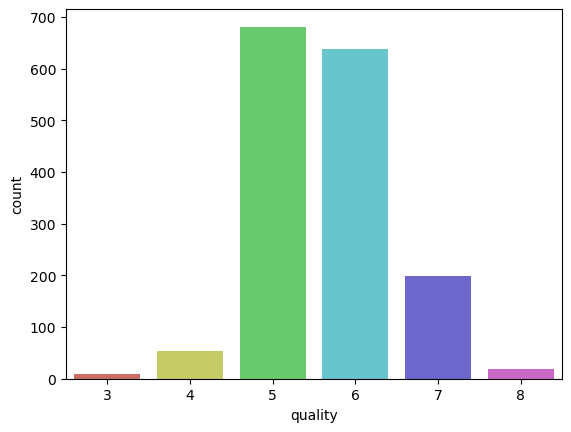

In [195]:
sns.countplot(x=df['quality'], palette='hls')

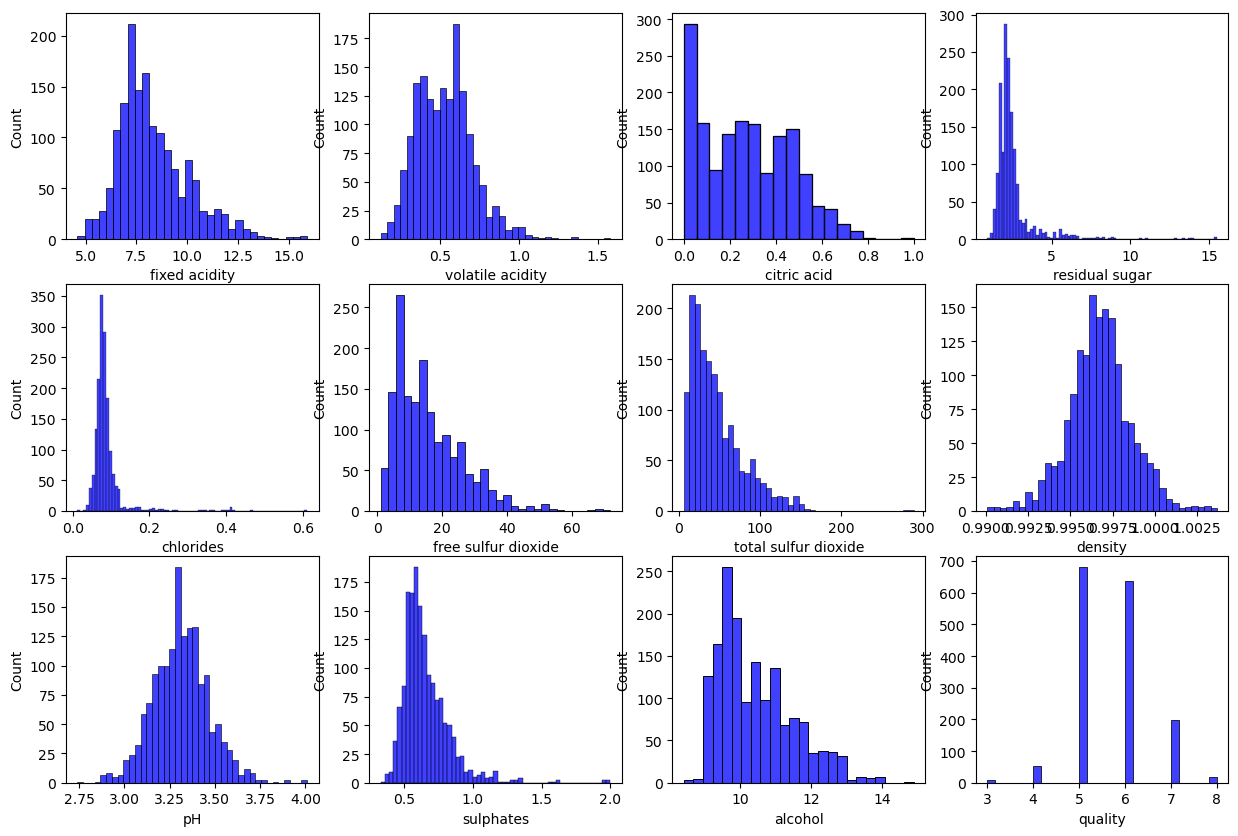

In [196]:
Num_fea = df.select_dtypes(exclude='object')
# disturbution of plot as subplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
            sns.histplot(df[df.columns[k]], ax=axes[i][j], color='blue')
            k += 1

plt.show()

In [197]:
# apply log transform on features
# df['volatile_acidity']=np.log(df['volatile_acidity'])
# df['citric_acid']=np.log(df['citric_acid'])
df["residual sugar"]=np.log(df["residual sugar"])
df["chlorides"]=np.log(df["chlorides"])
df["free sulfur dioxide"]=np.log(df["free sulfur dioxide"])
df["total sulfur dioxide"]=np.log(df["total sulfur dioxide"])
df["sulphates"]=np.log(df["sulphates"])
# df['alcohol']=np.log(df['alcohol'])

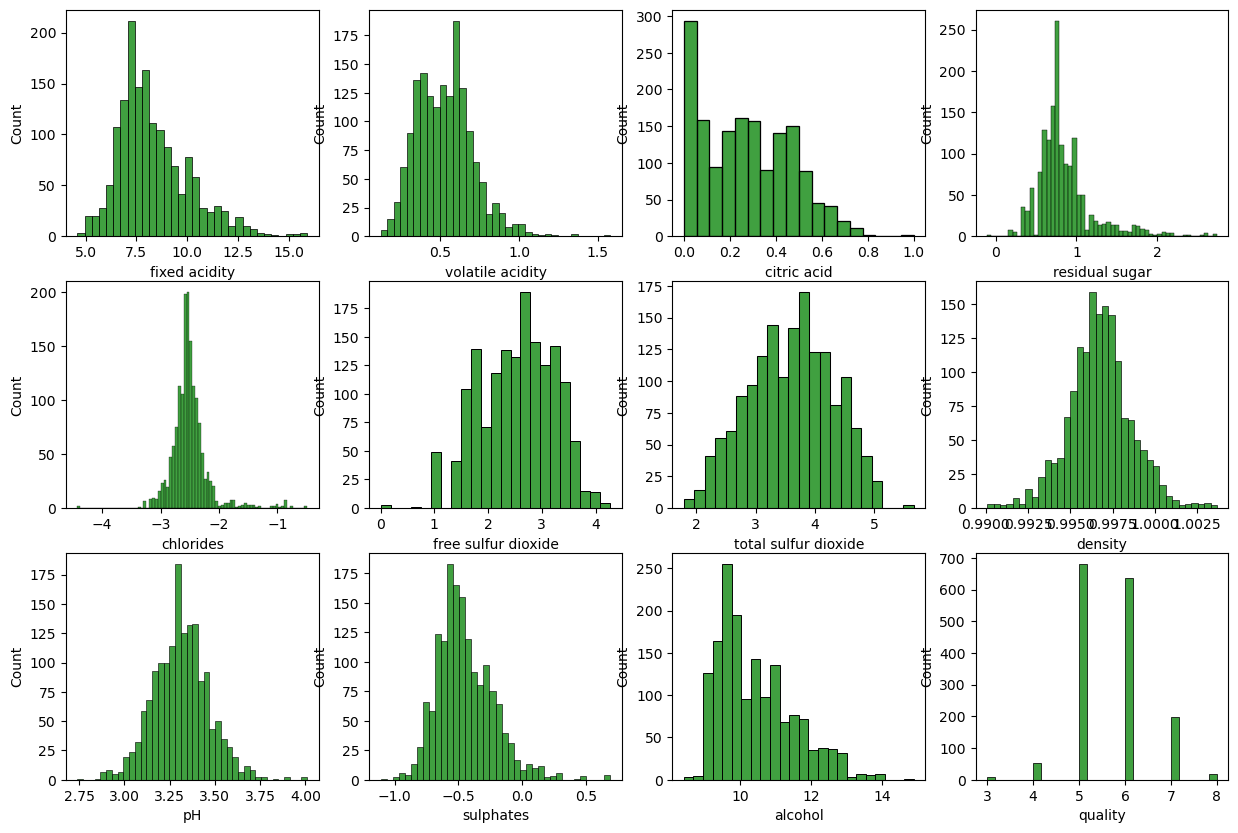

In [198]:
Num_fea = df.select_dtypes(exclude='object')
# disturbution of plot as subplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
            sns.histplot(df[df.columns[k]], ax=axes[i][j], color='green')
            k += 1

plt.show()

In [199]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [200]:
#duplicates
df.duplicated().sum()

np.int64(240)

In [201]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [202]:
#independant features
x = df.drop('quality', axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8
5,7.4,0.66,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4


In [203]:
y = df.quality
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [204]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

### IS IMBALANCED DATA, WE NEED TO CONVERT INTO BALANCED DATA, SO TO CONVERT WE USE IMBLEARN TO INSTALL we pip install imblearn by using upsampling

In [205]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
#transform the dataset
x, y = oversample.fit_resample(x, y)

In [206]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [207]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,0.848276,-2.502853,2.547871,3.604522,0.996709,3.309787,-0.444642,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.350004,0.336045,0.683899,0.711538,0.001869,0.155036,0.224199,1.082065,0.823578
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996700,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,0.640000,0.430000,0.955511,-2.396896,3.044522,4.143135,0.997820,3.400000,-0.314711,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,14.900000,8.000000


In [208]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.518322,0.417264,-1.272449,-0.649022,-0.202515,0.031347,0.262376,0.735804,1.146713,-0.609698,-1.145685
1,-0.279907,1.115357,-1.272449,0.269189,0.609065,1.257921,1.243990,0.203270,-0.871683,0.282764,-0.809674
2,-0.279907,0.649962,-1.076360,-0.089721,0.407382,0.494729,0.931838,0.309777,-0.481026,0.075363,-0.809674
3,1.746618,-1.211619,1.472800,-0.649022,-0.244797,0.681727,1.084305,0.842311,-1.132121,-0.448396,-0.809674
4,-0.518322,0.262132,-1.272449,-0.807301,-0.244797,0.280932,0.497557,0.735804,1.146713,-0.609698,-1.145685


In [209]:
from sklearn.model_selection import train_test_split

#ensure the train test split exists(self-healing)
if 'x_train' not in globals() and 'x_test' not in globals():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [210]:
#  Apply LogRegression

from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(x_train,y_train)
LogReg_acc=round(model_LogReg.score(x_test, y_test)*100)
LogReg_acc

61

In [211]:
# apply svm
# supprt vector machine
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy = round(r2_score(y_test, model.predict(x_test))*100)
SVR_Accuracy

88

In [212]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
DT_Accuracy = round(r2_score(y_test, model.predict(x_test))*100)
DT_Accuracy

86

In [213]:
# random forest classifier for discrete quality labels
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(x_train, y_train)
from sklearn.metrics import r2_score
RF_acc = round(RF_model.score(x_test, y_test)*100)
RF_acc

83

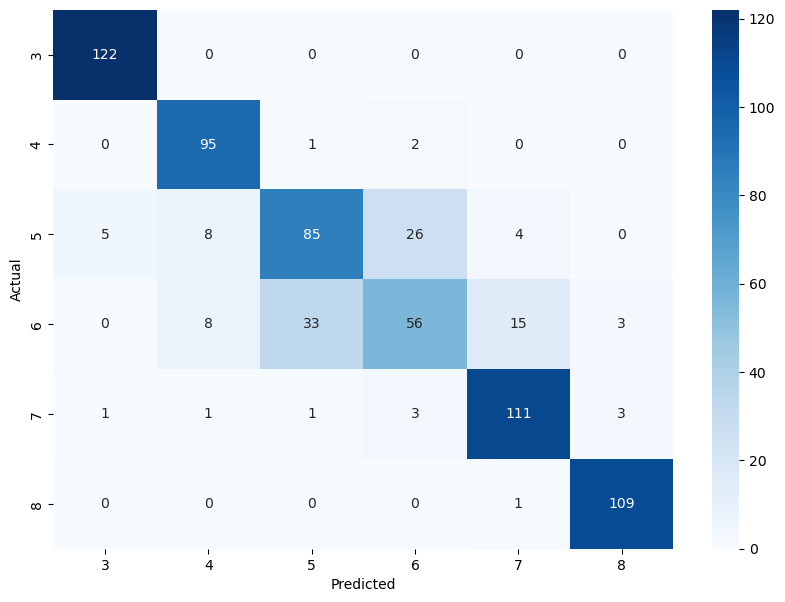

array([[122,   0,   0,   0,   0,   0],
       [  0,  95,   1,   2,   0,   0],
       [  5,   8,  85,  26,   4,   0],
       [  0,   8,  33,  56,  15,   3],
       [  1,   1,   1,   3, 111,   3],
       [  0,   0,   0,   0,   1, 109]])

In [214]:
#ensure RF_model exists(auto-train guard)
if 'RF_model' not in globals():
    RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
    RF_model.fit(x_train, y_train)
    print('Trained RF_model(auto)')

from sklearn.metrics import confusion_matrix
import numpy as np

#compute predictions and confusion matrix explicity for classifier
y_pred = RF_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.show()
cm

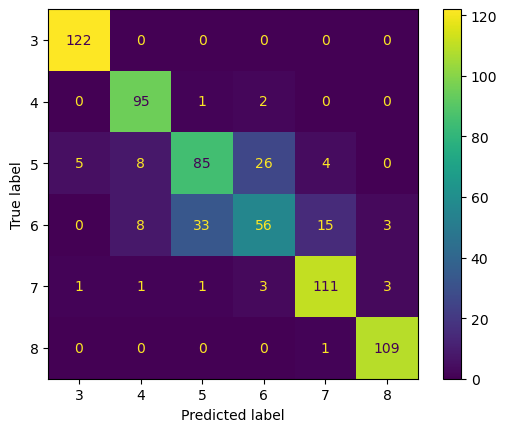

In [215]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot()
plt.show()

In [216]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':7.4,
    'volatile acidity':0.70,
    'citric acid':0.00,
    'residual sugar':0.645738,
    'chlorides':0.9,
    'free sulfur dioxide':0.56,
    'total sulfur dioxide':98,
    'density':1,
    'pH':8,
    'sulphates':6.8,
    'alcohol':5.3
}

# create dataframe with user input 
user_input= pd.DataFrame([feature_values],columns=feature_names)

# scaler
user_input = scaler.transform(user_input)
# make the prediction 
prediction = RF_model.predict(user_input)

print("predicted value", prediction)


predicted value [5]


In [219]:
# save scalar
import pickle
filename = 'finalized_model.sav'
pickle.dump(RF_model, open(filename, 'wb'))

In [220]:
# save random forest model
import pickle
filename = 'finalized_model.sav'
pickle.dump(RF_model, open(filename, 'wb'))